# Plotting animations of land cover <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with the `DEA Sandbox` environment
* **Products used:** 
[ga_ls_landcover_class_cyear_2](https://explorer.sandbox.dea.ga.gov.au/products/ga_ls_landcover_class_cyear_2)


## Background

Land cover is the observed physical cover on the Earth's surface, including trees, shrubs, grasses, soils, exposed rocks, water bodies, plantations, crops and built structures. 
Digital Earth Australia Land Cover (DEA Land Cover) is a continental dataset that maps annual land cover classifications for Australia from 1988 to the present. 
Detailed information about DEA Land Cover can be found in the [DEA Land Cover notebook](../DEA_datasets/DEA_Land_Cover.ipynb) and on the [DEA Land Cover product details](https://cmi.ga.gov.au/data-products/dea/607/dea-land-cover-landsat#details) page.

## Description

This notebook introduces the `lc_animation()` function and demonstrates how it can be used to visualise and communicate change over time.
Topics covered include: 

1. Loading a time series of DEA Land Cover data as an `xarray` dataset.
2. Plotting land cover as an animation.
3. Plotting a stacked line plot next to a land cover animation.
4. Modifying the way land cover is plotted as an animation.

***

## Getting started
To run this analysis, run all the cells in the notebook starting with the 'Load packages' cell.

### Load packages

In [1]:
%matplotlib inline

import math
import os
import sys

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

sys.path.insert(1, os.path.abspath("../Tools"))
from dea_tools.land_cover import lc_animation
from dea_tools.plotting import display_map

### Connect to the datacube

In [2]:
dc = datacube.Datacube(app="land_cover_animation")

### Create query and load a time series of land cover data

In order to generate animations of DEA Land Cover, we first need to load a time series of data for an area. 
As an example, let's load both the base 6-class classification (Level 3) layer and the full classification (Level 4) layer for Lake Wallawalla. 
This waterbody is located in the Murry River Valley in north western Victoria, and goes through cycles of drying and filling.

In [3]:
# Lake Wallawalla
point_x, point_y = (-34.1795, 141.1937)


lat = (point_x - 0.05, point_x + 0.05)
lon = (point_y - 0.1, point_y + 0.1)

# Display area on map
display_map(x=lon, y=lat)

In [4]:
# Build query and load data

query = {
    "y": lat,
    "x": lon,
    "time": ("1988", "2021"),
}

# Load DEA Land Cover data from the datacube
land_cover_data = dc.load(
    product="ga_ls_landcover_class_cyear_2",
    output_crs="EPSG:3577",
    measurements=["level3", "level4", "waterper_wat_cat_l4d_au"],
    resolution=(-25, 25),
    **query
)

In [5]:
# See what we have loaded
land_cover_data

<xarray.Dataset>
Dimensions:                  (time: 33, y: 499, x: 765)
Coordinates:
  * time                     (time) datetime64[ns] 1988-01-01 ... 2020-01-01
  * y                        (y) float64 -3.755e+06 -3.755e+06 ... -3.767e+06
  * x                        (x) float64 8.332e+05 8.333e+05 ... 8.523e+05
    spatial_ref              int32 3577
Data variables:
    level3                   (time, y, x) uint8 111 111 111 111 ... 111 111 111
    level4                   (time, y, x) int8 17 17 17 17 17 ... 34 16 16 16 16
    waterper_wat_cat_l4d_au  (time, y, x) int8 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Plot land cover animations 

### Plot default animation of Level 3 data

`lc_animation()` has a number of options for controlling the inclusion of colour bars and tick marks and the ability to add an animated stacked line plot beside the animated map. 
To begin, let's plot the Level 3 layer with all default options. 
This will plot a single animated map with tick marks and no colour bar. A copy of the animation will be saved to file as 'default_animation.gif'. 
This name can be changed by providing an alternative as the variable `file_name` as will be done in following examples.

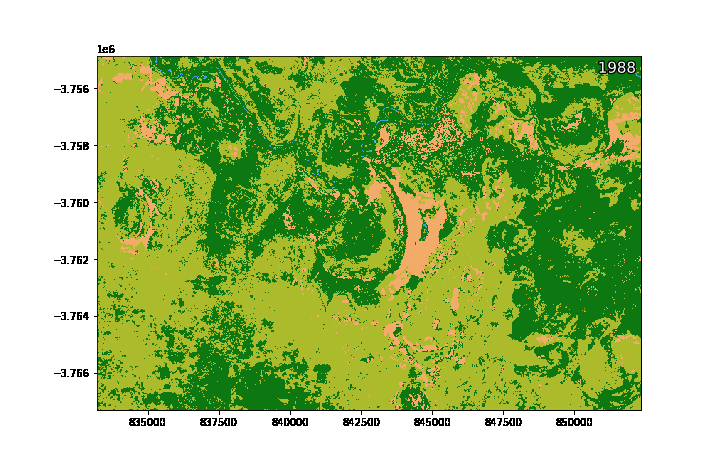

In [6]:
# Select Level 3 data
level_3 = land_cover_data["level3"]

# Generate plot
lc_animation(level_3)

### Plot animation with a stacked line plot

Adding the optional setting `stacked_plot=True` will generate a stacked line plot that is synchronised with the animated map. The stacked line plot shows what percentage of the map is taken up by each class in each year.
For this example we will use the full classification, Level 4 layer.

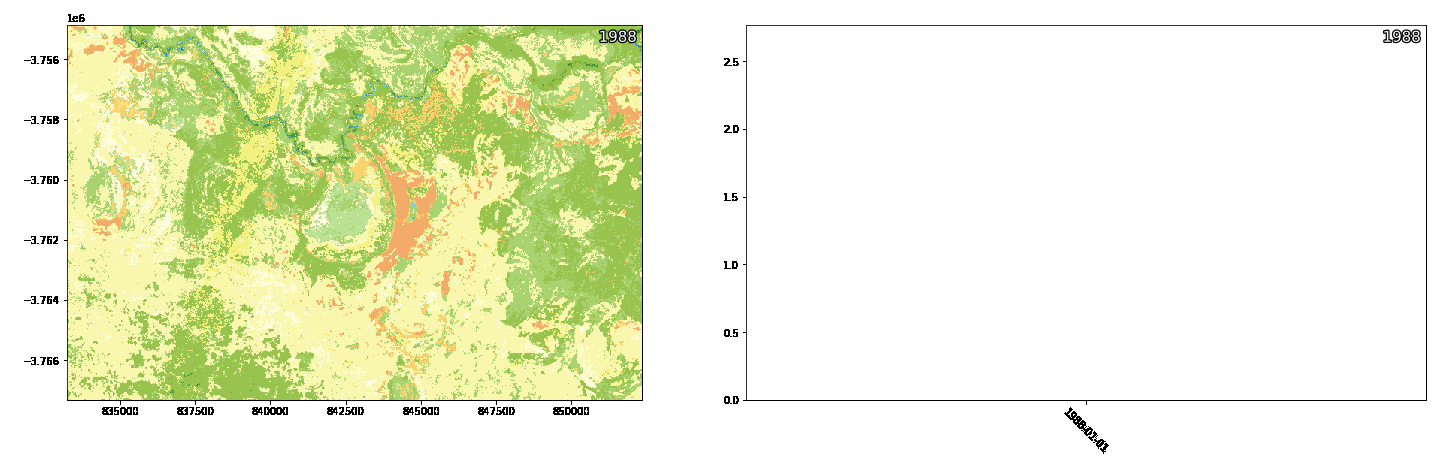

In [7]:
# Select Level 4
level_4 = land_cover_data["level4"]

# Set file name
file_name = "level_4_with_stacked_plot"

# Generate plot
lc_animation(level_4, file_name=file_name, stacked_plot=True)

## Modifying `lc_animation()`
`lc_animation()` contains many optional parameters allowing customisation of the appearance of the land cover animations. 
Below are examples of how some of them operate. 
For the full details of the parameters please refer to the [land_cover.py](../Tools/dea_tools/land_cover.py) file.


### Plot animation with colour bar

A colour bar can be added to the stand alone animation by including the optional setting `colour_bar=True`.  
> **Note:**  The colour bar does not work with the stacked line plot option.

Let's generate an example using the water persistence layer.



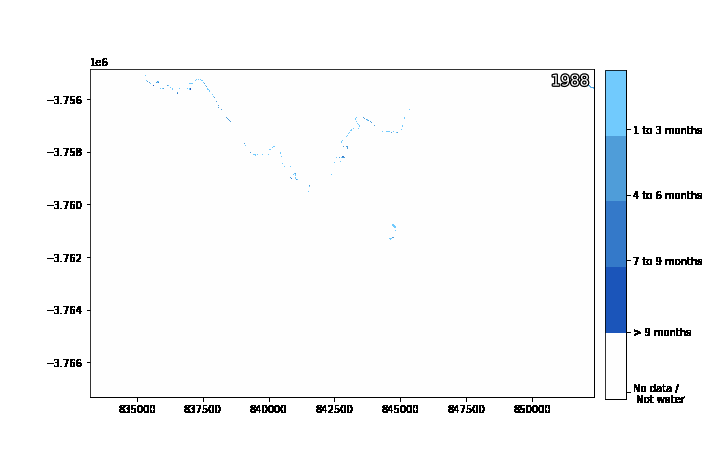

In [8]:
# Select water persistance layer
water_per = land_cover_data["waterper_wat_cat_l4d_au"]

# Set file name
file_name = "water_persistence_animation"

# Generate plot
lc_animation(water_per, file_name=file_name, colour_bar=True)

### Plot with no axes ticks

If you want to make an animation for communication purposes, perhaps you don't want to have any tick marks on the axes. In this case you include `ticks=False`.

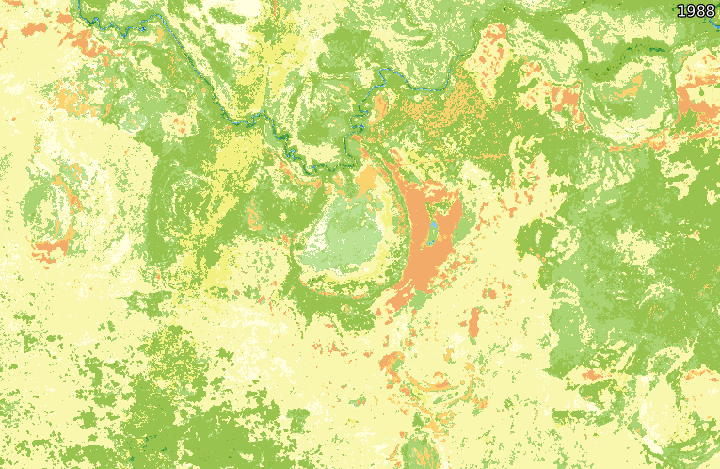

In [9]:
# Select Level 4
level_4 = land_cover_data["level4"]

# Set file name
file_name = "level_4_no_ticks_example"

# Generate plot
lc_animation(level_4, file_name=file_name, label_ax=False)

## Why is my animation producing an error or plotting no data? 

`lc_animation()` uses the name of the `xarray.DataArray` to identify what colour map should be used to create the animation. 
If, in your analysis, you have created a new `xarray.DataArray` object you will need to ensure that you either:
1. Name the `xarray.DataArray` after the layer being plotted.
2. Use the `layer` setting to specify the layer. 

Plotting a layer with the incorrect colour map will result in an error or the data being plotted as nodata. 

The next cell shows what happens when the name of the `xarray.DataArray` does not correspond to any predefined colour map. 

In [10]:
# Select Level 3
level_3 = land_cover_data["level3"]

data = np.where(level_3 == 112, level_3, 0)

# Create a new Xarray.DataArray, so we can plot
xr_veg = xr.DataArray(data=data,
                        coords=level_3.coords,
                        dims=level_3.dims, name="ntv_only",
                        attrs=None, indexes=level_3.indexes, fastpath=False)

# Set file name
file_name = "missing_layer_example"

# Generate plot
lc_animation(xr_veg, file_name=file_name, colour_bar=True)

AssertionError: colour scheme must be one of [dict_keys(['level3', 'level3_change_colour_scheme', 'level3_change_colour_bar', 'lifeform_veg_cat_l4a', 'canopyco_veg_cat_l4d', 'waterstt_wat_cat_l4a', 'watersea_veg_cat_l4a_au', 'inttidal_wat_cat_l4a', 'waterper_wat_cat_l4d_au', 'baregrad_phy_cat_l4d_au', 'level4', 'level4_colourbar_labels'])] (got "ntv_only")

To fix the error, you can change the `name` of the `xarray.DataArray` to `"level3"`.

Alternatively, you can use the `layer` setting to specify the layer. The below example demonstrates how to use the `layer` argument.

In [ ]:
# Set file name
file_name = "missing_layer_example_working"

# Generate plot
lc_animation(xr_veg, layer='level3', file_name=file_name, colour_bar=True)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** February 2022

**Compatible datacube version:** 

In [ ]:
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)